# Data Science Jobs Project



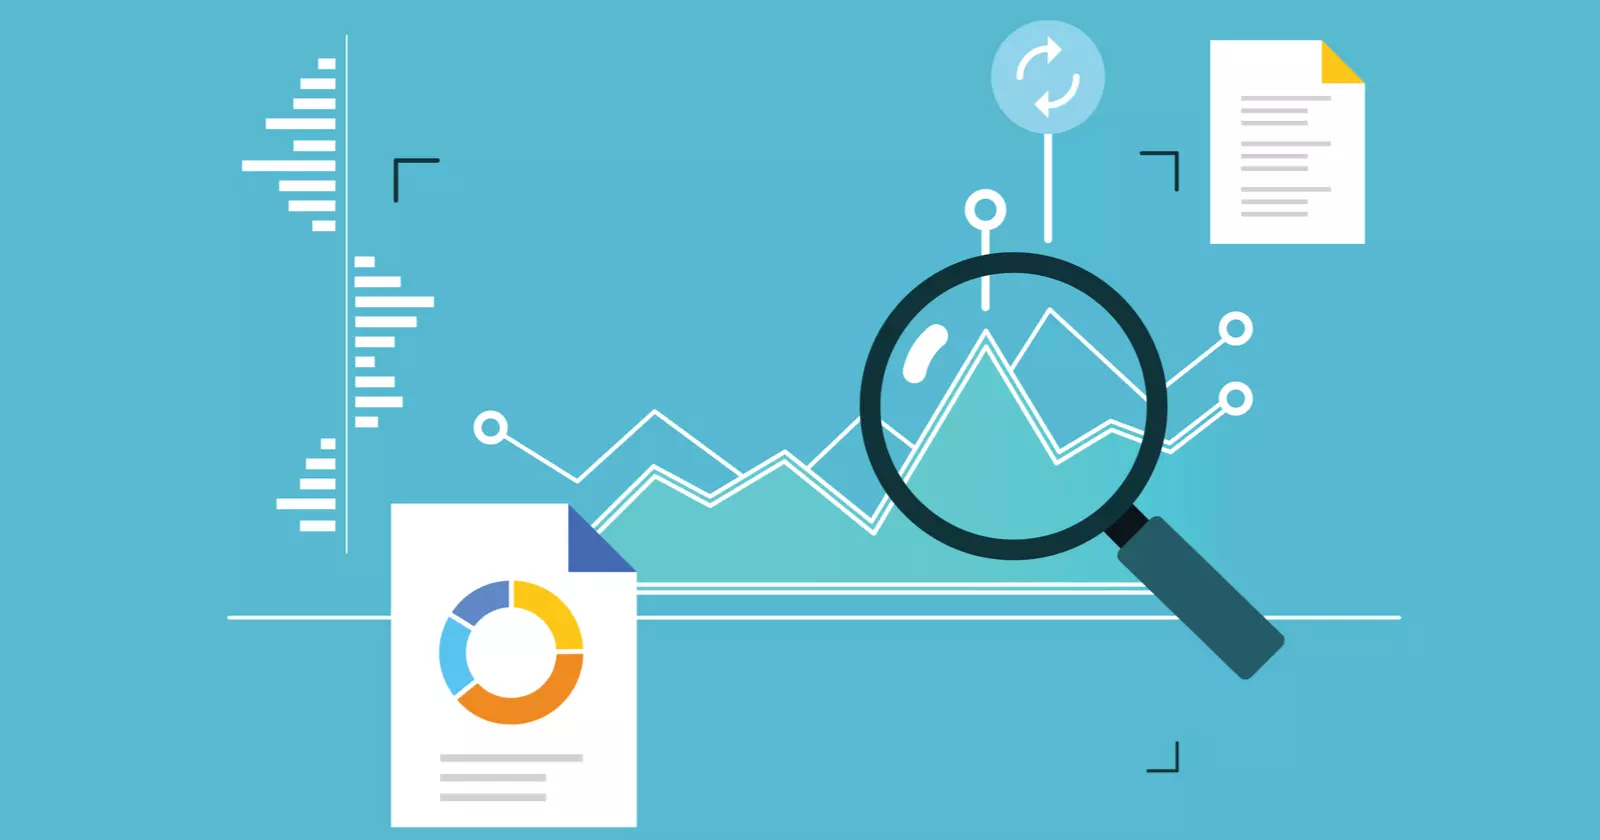

В данном блокноте я буду проводить разведочный анализ данных на наборе данных о зарплатах в различных компаниях. Данные включают информацию о минимальной, максимальной и средней зарплате, а также другие соответствующие переменные, такие как отрасль, местоположение и размер компании.

> Очистка данных

На начальном этапе я изучу общее описание данных, посмотрю на типы переменных, проверю наличие пропущенных значений и оценю базовую статистику.

> Визуализация

Затем я переключусь на визуальный анализ, создавая различные графики и диаграммы для выявления шаблонов и отклонений в данных. Я буду использовать такие типы визуализаций, как гистограммы, плоты, тепловые карты.

> Статистика

Я проведу корреляционный анализ между различными переменными, чтобы понять, какие из них связаны друг с другом и как сильна эта связь.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files
from plotly.subplots import make_subplots
import plotly.graph_objs as go


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


uploaded = files.upload()

Saving DataScientist.csv to DataScientist (1).csv


#  ● Получение информации о наборе данных

In [3]:
vacancy_data = pd.read_csv('/content/DataScientist.csv')
vacancy_data.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1


In [4]:
vacancy_data = vacancy_data.dropna()

In [5]:
vacancy_data.isnull().sum()

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
vacancy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

# ● Предобработка набора данных

In [7]:
vacancy_data.drop_duplicates()
vacancy_data.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1


> В колонке *Easy Apply* неверно записаны значения. Вместо значений *-1* запишу *False*.



In [8]:
vacancy_data['Easy Apply'] = vacancy_data['Easy Apply'].fillna(False).astype(bool)

In [9]:
vacancy_data.replace(['-1'], [np.nan], inplace=True)
vacancy_data.replace(['-1.0'], [np.nan], inplace=True)
vacancy_data.replace([-1], [np.nan], inplace=True)

> В колонке *Company Name* значения записаны с ошибкой. К названию компании клеится еще рейтинг с пометкой '/n'. Исправлю это:

In [10]:
for i in range(vacancy_data.shape[0]):
    name = vacancy_data.loc[i,"Company Name"]
    if "\n" in name:
        name,_ = name.split("\n")
    vacancy_data.loc[i,"Company Name"] = name

In [11]:
vacancy_data.isnull().sum()

Unnamed: 0              0
index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Company Name            0
Location                0
Headquarters          240
Size                  229
Founded               977
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Competitors          2760
Easy Apply              0
dtype: int64

> Переименую столбцы, уберу лишнее из содержимого столбцов.

In [12]:
vacancy_data[['Location_City', 'Location_State']] = vacancy_data['Location'].str.split(',', expand=True)
vacancy_data.drop('Location', axis=1)
vacancy_data.tail(1)

# Разбиение значений столбца *Location*

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Location_City,Location_State
3908,3908,4379,Patient Safety Physician or Safety Scientist -...,$55K-$112K (Glassdoor est.),"Help us transform patients' lives.\nAt UCB, we...",3.7,UCB,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,NaN,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,True,Slough,OH


In [13]:
vacancy_data[['Headquarters_City', 'Headquarters_State', 'Index']] = vacancy_data['Headquarters'].str.split(',', expand=True)
vacancy_data.drop('Headquarters', axis=1)
vacancy_data.drop('Index', axis=1)
vacancy_data.head(1)

# Разбиение значений столбца *Headquarters*

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Location_City,Location_State,Headquarters_City,Headquarters_State,Index
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,True,New York,NY,Montreal,Canada,None


In [14]:
vacancy_data['Revenue'].head(5)
vacancy_data['Revenue'] = vacancy_data['Revenue'].replace('Unknown / Non-Applicable', 'None-Information')

> Мне на нравится запись в столбце зарплат. Поработаю со столбцом и оставлю в нем только числовые значения, разобью столбец на максимальные и минимальные зарплаты.

In [15]:
df_salary = vacancy_data['Salary Estimate'].str.split('-', expand=True)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K', " ")

In [16]:
maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

In [17]:
vacancy_data['Min Salary'] = minimum_salary
vacancy_data['Max Salary'] = maximum_salary

vacancy_data['Company Name'] =vacancy_data['Company Name'].str.replace('\n.*', ' ')
vacancy_data['Est_Salary']= (vacancy_data['Min Salary'] + vacancy_data['Max Salary'])/2
vacancy_data.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Location_City,Location_State,Headquarters_City,Headquarters_State,Index,Min Salary,Max Salary,Est_Salary
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,None-Information,NaN,True,New York,NY,Montreal,Canada,None,111,181,146.0


# ● Визуализация

> В какой сфере больше всего вакансий для дата-аналитиков?

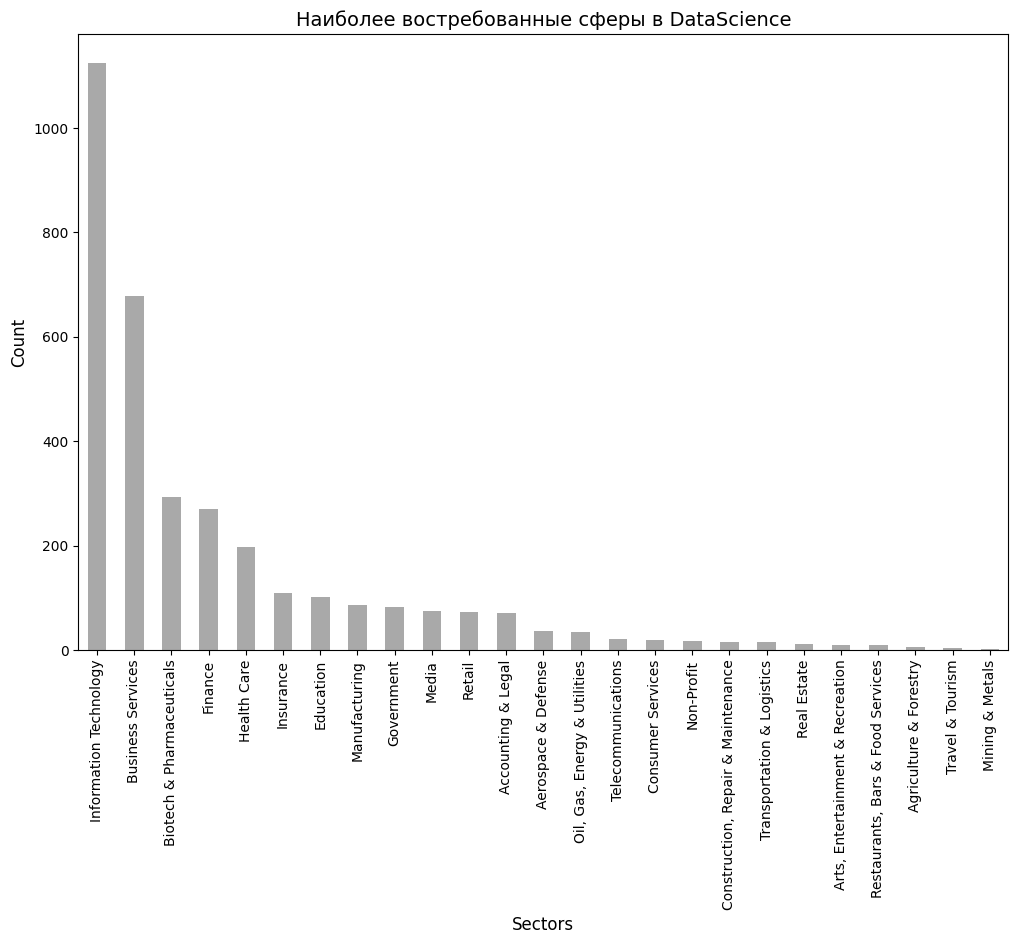

In [18]:
plt.rcParams['figure.figsize'] = (12,8)
vacancy_data["Sector"].value_counts().sort_values(ascending=False).plot.bar(color='#A9A9A9')
plt.rcParams['lines.linewidth'] = 10
plt.title("Наиболее востребованные сферы в DataScience",fontsize=14)
plt.xlabel("Sectors",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

> По графику видно, что больше всего специалистов Data Science в сфере информационных технологий >```1000```, деловых услуг, биотехнологий. Меньше всего вакансий в диапозоне добычи ископаемых >```0```.

> Рассмотрим **топ-12** компаний для Data Science специалистов.


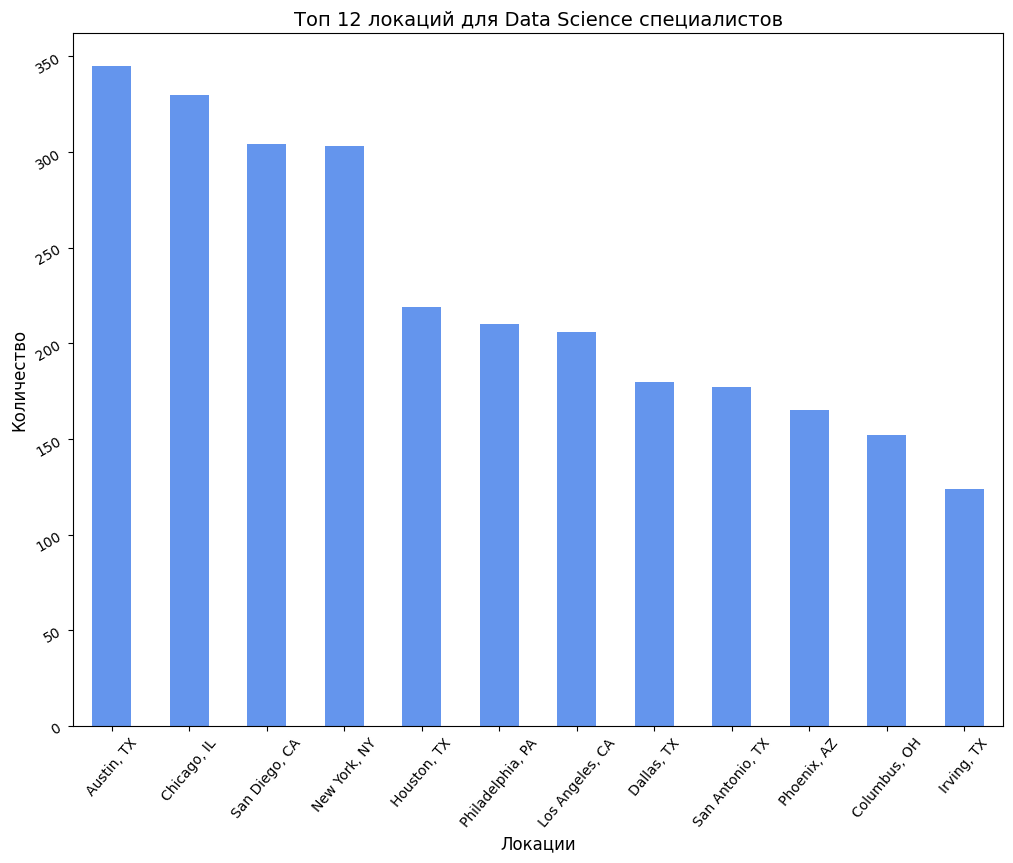

In [19]:
plt.rcParams['figure.figsize'] = (12,9)
vacancy_data["Location"].value_counts().sort_values(ascending=False).head(12).plot.bar(color='#6495ED')
plt.title("Топ 12 локаций для Data Science специалистов",fontsize=14)
plt.xlabel("Локации",fontsize=12)
plt.xticks(rotation=50)
plt.ylabel("Количество",fontsize=12)
plt.yticks(rotation=30)
plt.show()

> Лидирующее количество вакансий находится в Америке, в городе Остин, штат Техас. Количество вакансий: ~```340```. В городе Ирвинг, Кроумбус предложений о работе меньше всего ~```140```. Это не так плохо.

> Давайте взглянем на типы собственности компании. Какие они вообще бывают ?

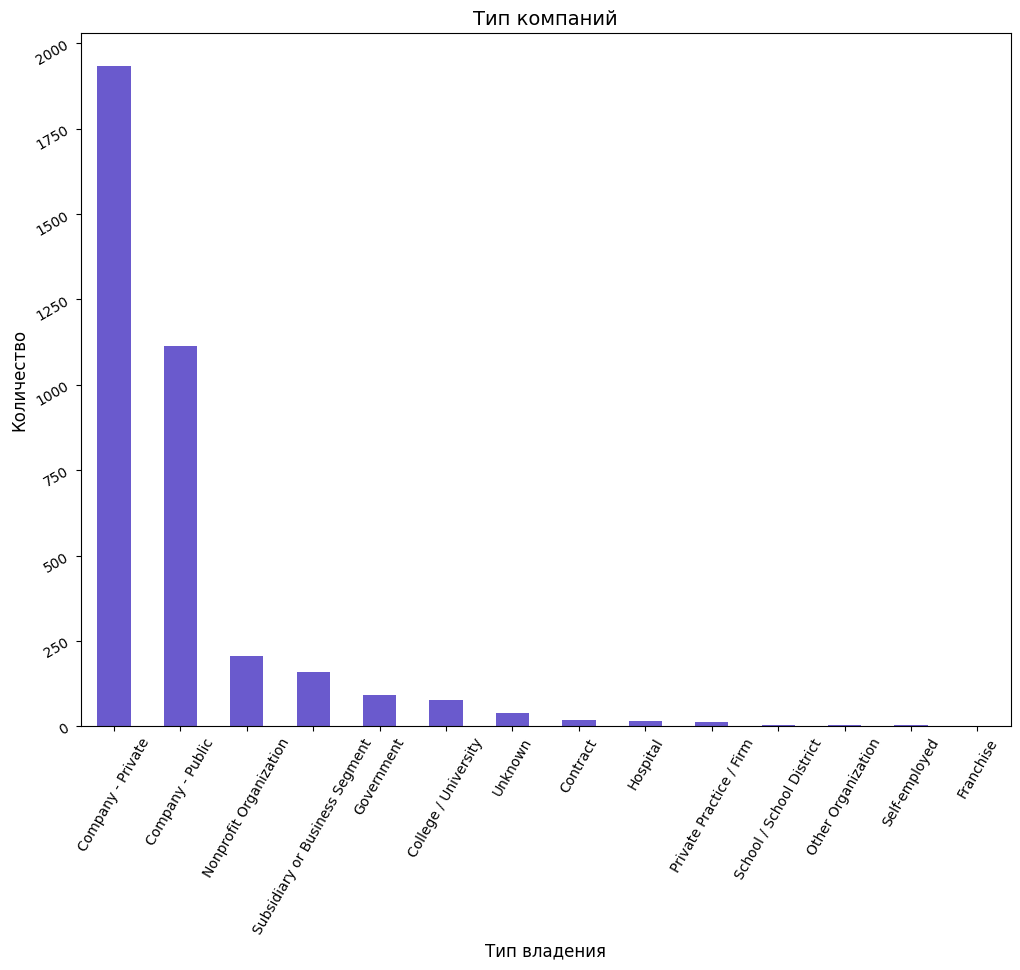

In [20]:
plt.rcParams['figure.figsize'] = (12,9)
vacancy_data["Type of ownership"].value_counts().sort_values(ascending=False).plot.bar(color='#6A5ACD')
plt.title("Тип компаний",fontsize=14)
plt.xlabel("Тип владения",fontsize=12)
plt.xticks(rotation=60)
plt.ylabel("Количество",fontsize=12)
plt.yticks(rotation=30)
plt.show()

> Первое место занимают комании типа частной собственности, количество таких компаний стремится к ```2000```. Далее идут публичные компании, т.е копании, которые работают с государством, количество таких организаций превышает ```1000```. И на третьем месте у нас распологаются некомерческие организации. Могу предположить, что это различные фонды, общественные объеденения. Количество такого типа организаций ~ ```240```.




> Рассмотрим топ 5 компаний с ***наивысшей*** / ***наименьшей*** заработной платой



In [40]:
max_salary_sorted_df = vacancy_data.sort_values(by='Max Salary', ascending=False)

top_companies = max_salary_sorted_df['Company Name'].head(5)
top_salaries = max_salary_sorted_df['Max Salary'].head(5)

top_data = max_salary_sorted_df.head(5)

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'bar'}]])

fig.add_trace(go.Bar(
    x=top_companies,
    y=top_salaries,
    marker_color='rgba(50, 171, 96, 0.6)',
    marker_line_color='rgb(8, 48, 107)',
    marker_line_width=1.5,
    opacity=0.8,
    hovertemplate='<b>%{x}</b><br>' +
                  'Максимальная заработная плата: %{y:,.0f}<extra></extra>'
))

fig.update_layout(
    title='Топ-5 компаний с наивысшей заработной платой',
    xaxis_title='Компания',
    yaxis_title='Максимальная заработная плата',
    font=dict(size=14),
    hoverlabel=dict(font_size=16, font_family="Rockwell"),
    transition_duration=500,
    bargap=0.1,
)


fig.layout.updatemenus = [
    dict(
        type="buttons",
        buttons=[
            dict(
                label="Play",
                method="animate",
                args=[None, {"frame": {"duration": 500, "redraw": True},
                              "transition": {"duration": 500}}],
            ),
            dict(
                label="Pause",
                method="animate",
                args=[[None], {"frame": {"duration": 0, "redraw": False},
                                "mode": "immediate",
                                "transition": {"duration": 0}}],
            )
        ]
    )
]

fig.show()
fig.write_html('plot.html')

In [41]:
max_salary_sorted_df = vacancy_data.sort_values(by='Min Salary', ascending=True)

top_companies = max_salary_sorted_df['Company Name'].head(5)
top_salaries = max_salary_sorted_df['Min Salary'].head(5)

top_data = max_salary_sorted_df.head(5)

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'bar'}]])

fig.add_trace(go.Bar(
    x=top_companies,
    y=top_salaries,
    marker_color='rgba(50, 171, 96, 0.6)',
    marker_line_color='rgb(8, 48, 107)',
    marker_line_width=1.5,
    opacity=0.8,
    hovertemplate='<b>%{x}</b><br>' +
                  'Максимальная заработная плата: %{y:,.0f}<extra></extra>'
))

fig.update_layout(
    title='Топ-5 компаний с наименьшей заработной платой',
    xaxis_title='Компания',
    yaxis_title='Миниамльная заработная плата',
    font=dict(size=14),
    hoverlabel=dict(font_size=16, font_family="Rockwell"),
    transition_duration=500,
    bargap=0.1,
)


fig.layout.updatemenus = [
    dict(
        type="buttons",
        buttons=[
            dict(
                label="Play",
                method="animate",
                args=[None, {"frame": {"duration": 500, "redraw": True},
                              "transition": {"duration": 500}}],
            ),
            dict(
                label="Pause",
                method="animate",
                args=[[None], {"frame": {"duration": 0, "redraw": False},
                                "mode": "immediate",
                                "transition": {"duration": 0}}],
            )
        ]
    )
]

fig.show()
fig.write_html('plot.html')

> Корреляция зарплат

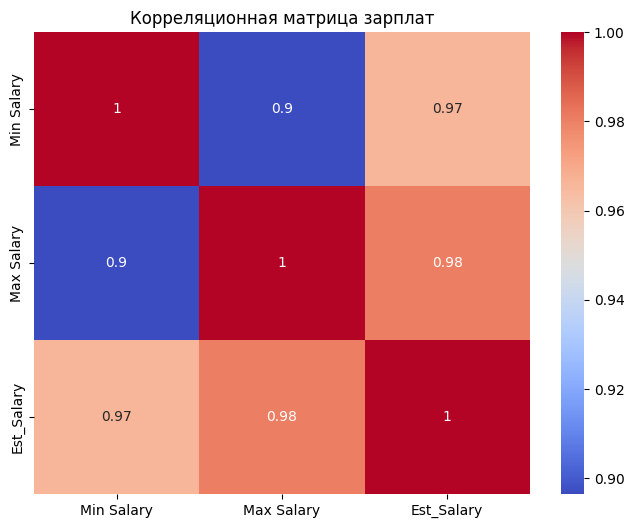

<Figure size 1000x600 with 0 Axes>

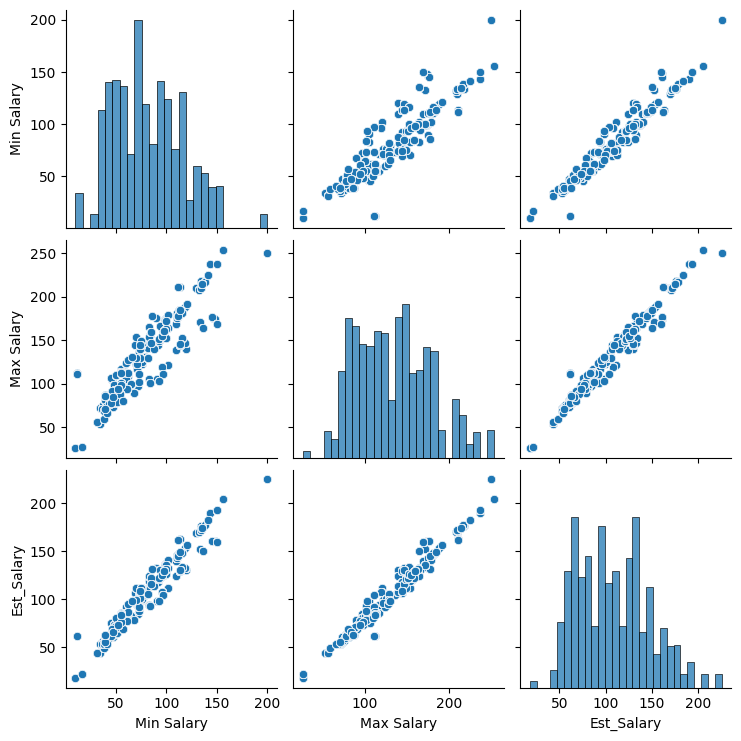

In [23]:
salary_columns = ['Min Salary', 'Max Salary', 'Est_Salary']

corr_mx = vacancy_data[salary_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_mx, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица зарплат')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(vacancy_data[salary_columns])
plt.show()

In [24]:
vacancy_data.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Location_City,Location_State,Headquarters_City,Headquarters_State,Index,Min Salary,Max Salary,Est_Salary
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,None-Information,NaN,True,New York,NY,Montreal,Canada,None,111,181,146.0


In [42]:
data_size = vacancy_data


df_size = pd.DataFrame(data_size)


df_size[['Min Size', 'Max Size']] = df_size['Size'].apply(lambda x: pd.Series(str(x).replace('employees', '').replace('Unknown', '0').replace('+', '').replace('to', '-').strip().split('-')))
df_size['Avg Size'] = df_size[['Min Size', 'Max Size']].apply(lambda x: pd.to_numeric(x, errors='coerce')).mean(axis=1)
df_size['Max Size'] = df_size['Max Size'].astype('float64')
df_size['Min Size'] = df_size['Min Size'].astype('float64')


top_10 = df_size.sort_values('Avg Size', ascending=False).head(10)

fig = px.bar(top_10, x='Company Name', y='Avg Size', title='Топ 10 компаний с наивысшим средним значением количества сотрудников')
fig.show()
fig.write_html('plot.html')
